**Descripción del proyecto**

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

**Tienes que**:

Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.

Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.

Analizar los factores que más impactan la pérdida.

Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
identificar a los grupos objetivo;
sugerir medidas para reducir la rotación;
describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

El dataset incluye los siguientes campos:

'Churn' — la cancelación para el mes en cuestión

Campos de dataset actuales:

Datos del usuario del mes anterior
'gender'.

'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.

'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).

Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).

'Phone' — si el/la usuario/a aportó el número de teléfono.

'Age'.

'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:

'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.

'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.

'Group_visits' — si el/la usuario/a participa en sesiones grupales.

'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo
 de la vida del cliente.

'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.

'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('/gym_churn_us.csv')

# Display basic information about the dataset
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Observaciones Iniciales**:

Género (gender): La proporción de clientes está casi equilibrada entre hombres (0) y mujeres (1).

Ubicación cercana (Near_Location): La mayoría de los clientes vive o trabaja cerca del gimnasio (84.5%).

Socios (Partner): Cerca del 48.7% de los clientes trabaja en una compañía asociada.

Promociones de amigos (Promo_friends): Aproximadamente el 30.9% de los clientes se inscribió mediante una oferta “trae a un amigo”.

Teléfono (Phone): El 90.4% de los clientes proporcionó su número de teléfono.

Período de contrato (Contract_period): La duración promedio del contrato es de 4.68 meses.

Visitas grupales (Group_visits): El 41.2% de los clientes participa en sesiones grupales.

Edad (Age): La edad promedio de los clientes es de 29 años.

Cargos adicionales promedio (Avg_additional_charges_total): Los clientes gastan en promedio $146.94 en servicios adicionales.

Meses hasta el fin del contrato (Month_to_end_contract): En promedio, faltan 4.32 meses para que los contratos expiren.

Tiempo de vida (Lifetime): El tiempo promedio desde que los clientes se unieron es de 3.72 meses.

Frecuencia de clases promedio (Avg_class_frequency_total): Los clientes asisten en promedio 1.88 veces por semana a lo largo de su vida como miembros.

Frecuencia de clases en el mes actual (Avg_class_frequency_current_month): En el mes en curso, la frecuencia promedio de visitas es de 1.77 veces por semana.

Cancelación (Churn): El 26.5% de los clientes canceló su membresía en el mes en cuestión.

In [ ]:
# Group the data by the 'Churn' column and calculate the mean for each group
grouped_data_means = data.groupby('Churn').mean()
grouped_data_means


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


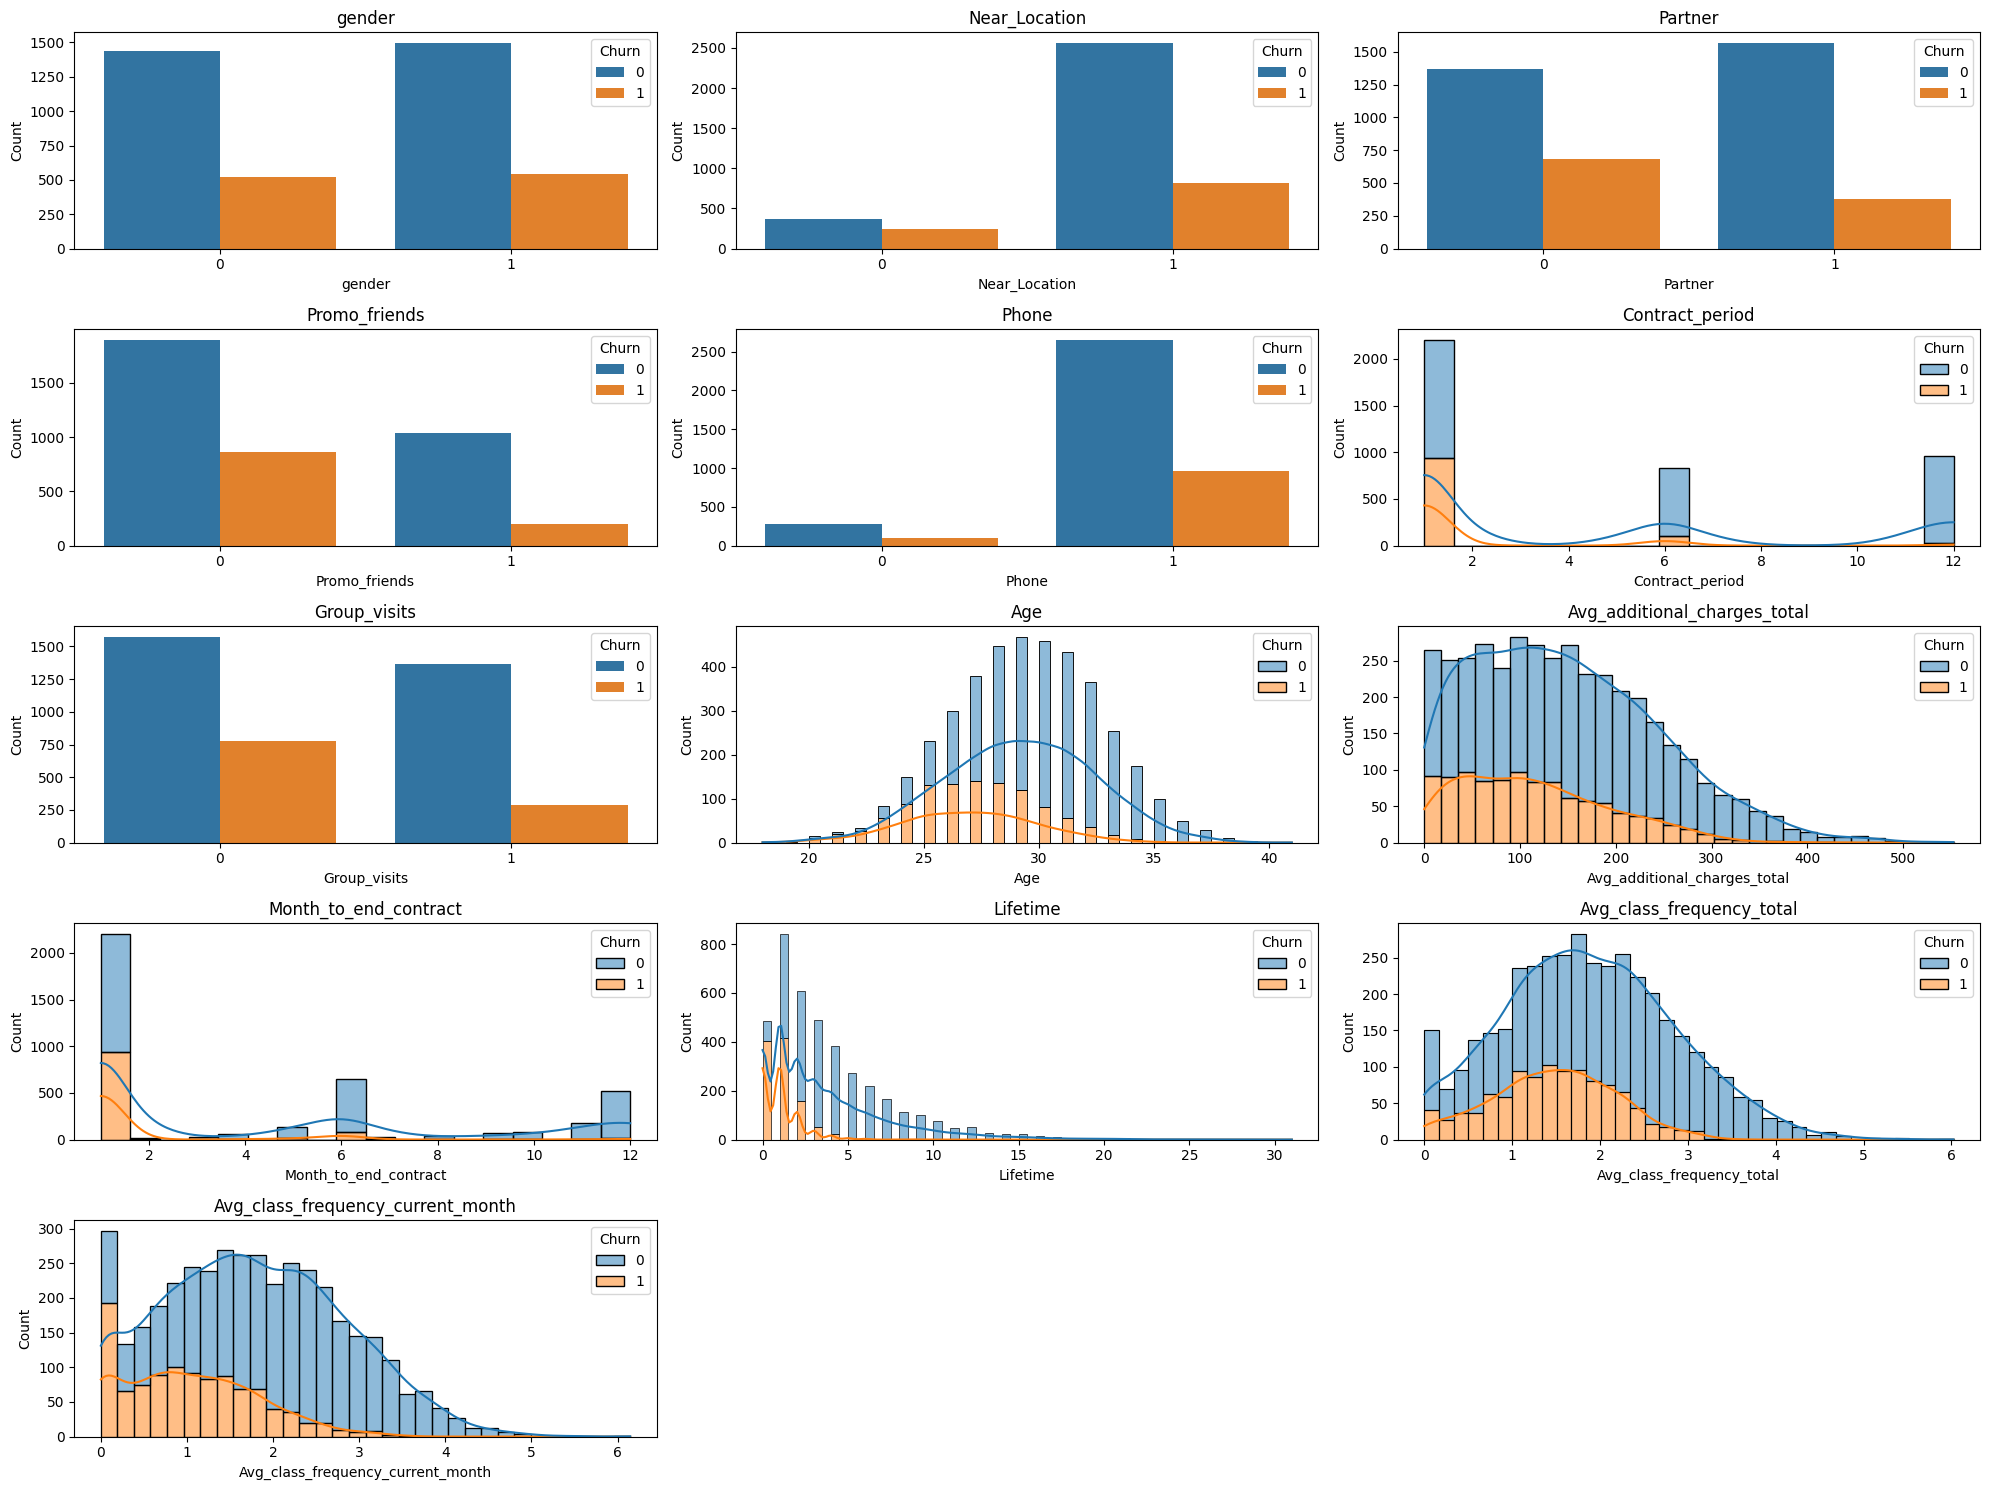

In [ ]:

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Define the columns to plot
columns_to_plot = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
                   'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total',
                   'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total',
                   'Avg_class_frequency_current_month']

# Plot histograms for continuous columns and bar plots for categorical columns, separated by Churn
for i, column in enumerate(columns_to_plot):
    plt.subplot(5, 3, i + 1)
    if column in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']:
        sns.countplot(data=data, x=column, hue='Churn')
    else:
        sns.histplot(data=data, x=column, hue='Churn', multiple='stack', kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


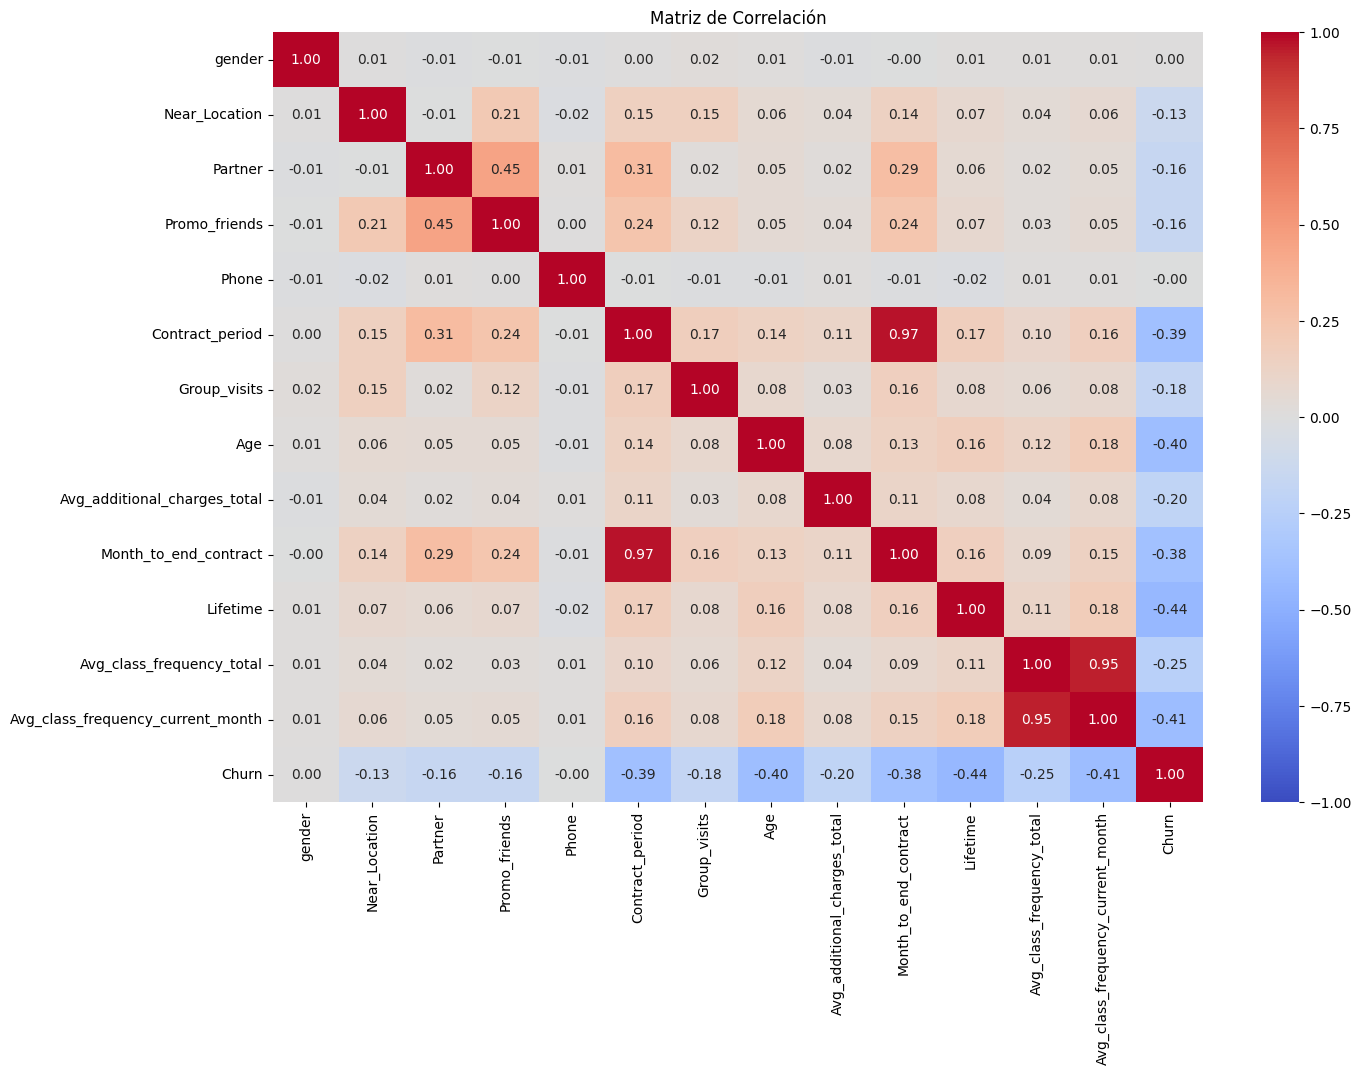

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


**Observaciones Clave:**

Ubicación cercana (Near_Location): Los clientes que se quedaron tienen una mayor probabilidad de vivir o trabajar cerca del gimnasio (87.3%) en comparación con los que cancelaron (76.8%).

Socios (Partner): Una mayor proporción de clientes que se quedaron trabaja en una compañía asociada (53.4%) en comparación con los que cancelaron (35.5%).

Promociones de amigos (Promo_friends): Los clientes que se quedaron se inscribieron mediante la oferta “trae a un amigo” en mayor proporción (35.4%) que los que cancelaron (18.4%).

**Construir un modelo para predecir la cancelación de usuarios**

In [ ]:
# Definir características y objetivo
X = data.drop('Churn', axis=1)
y = data['Churn']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Entrenar el modelo de bosque aleatorio
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred_log_reg = log_reg.predict(X_val)
y_pred_rf_clf = rf_clf.predict(X_val)

In [ ]:
# Evaluar el modelo de regresión logística
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)

# Evaluar el modelo de bosque aleatorio
accuracy_rf_clf = accuracy_score(y_val, y_pred_rf_clf)
precision_rf_clf = precision_score(y_val, y_pred_rf_clf)
recall_rf_clf = recall_score(y_val, y_pred_rf_clf)

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_log_reg, accuracy_rf_clf],
    'Precision': [precision_log_reg, precision_rf_clf],
    'Recall': [recall_log_reg, recall_rf_clf]
})

results

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.91625,0.872928,0.782178
1,Random Forest,0.91000,0.849462,0.782178


La regresión logística parece ser el modelo con mejor desempeño en términos de exactitud y precisión para predecir la cancelación de usuarios en este caso.

**Crear clústeres de usuarios/as**

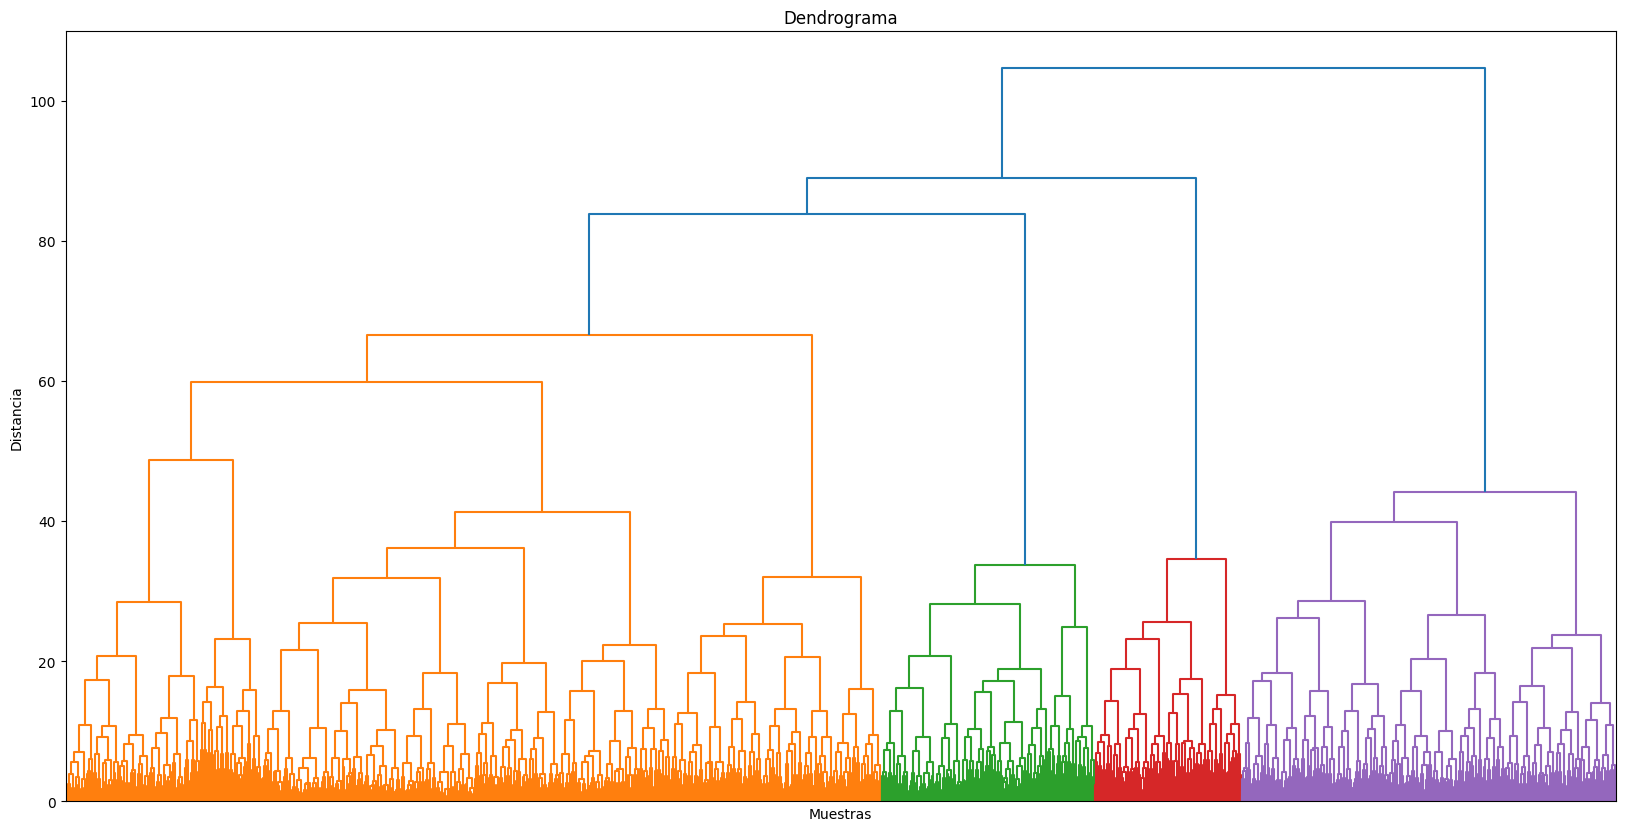

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear una matriz de distancias y trazar un dendrograma
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False, no_labels=True)
plt.title('Dendrograma')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()


El dendrograma muestra la estructura jerárquica de los datos y sugiere la presencia de varios clústeres. Para simplificar, usaremos n=5 clústeres para el análisis con K-means.

In [ ]:
# Entrenar el modelo de K-means con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar los clústeres al DataFrame original
data['Cluster'] = clusters

# Calcular los valores medios de las características para cada clúster
cluster_means = data.groupby('Cluster').mean()

# Calcular la tasa de cancelación para cada clúster
churn_rate_by_cluster = data.groupby('Cluster')['Churn'].mean()

cluster_means, churn_rate_by_cluster


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(           gender  Near_Location   Partner  Promo_friends  Phone  \
 Cluster                                                            
 0        0.502370       0.949447  0.829384       0.998420    1.0   
 1        0.554556       0.849269  0.263217       0.052868    1.0   
 2        0.499422       0.937572  0.737572       0.478613    1.0   
 3        0.485738       0.718011  0.299919       0.018745    1.0   
 4        0.523316       0.862694  0.471503       0.305699    0.0   
 
          Contract_period  Group_visits        Age  \
 Cluster                                             
 0               3.097946      0.448657  29.104265   
 1               2.606299      0.436445  30.008999   
 2              11.854335      0.546821  29.905202   
 3               1.914425      0.276284  28.083945   
 4               4.777202      0.427461  29.297927   
 
          Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
 Cluster                                                    

**Observaciones:**

Clúster 0: Tiene una tasa de cancelación moderada (24.6%). Los clientes de este clúster tienden a vivir cerca del gimnasio, tienen una alta participación en la promoción "trae a un amigo" y tienen contratos relativamente cortos.

Clúster 1: Presenta la segunda tasa de cancelación más baja (9.0%). Estos clientes tienden a vivir cerca del gimnasio, pero pocos son parte de la promoción "trae a un amigo". Tienen una alta frecuencia de clases.

Clúster 2: Tiene la tasa de cancelación más baja (2.2%). Estos clientes tienen contratos largos, alta participación en visitas grupales y cargos adicionales.

Clúster 3: Presenta la tasa de cancelación más alta (57.3%). Los clientes de este clúster tienden a vivir más lejos del gimnasio, tienen la menor participación en la promoción "trae a un amigo" y los contratos más cortos.

Clúster 4: Tiene una tasa de cancelación moderada (26.7%). Estos clientes tienen una distribución equilibrada de características y no proporcionaron su número de teléfono.

**Conclusiones**

Diferencias en la Tasa de Cancelación: Hay una variación significativa en las tasas de cancelación entre los distintos clústeres de clientes. Los clústeres con contratos más largos y una mayor participación en actividades grupales tienen tasas de cancelación más bajas.

Importancia de la Ubicación: Los clientes que viven o trabajan cerca del gimnasio tienen una menor probabilidad de cancelar su membresía.

Impacto de las Promociones: Las promociones como "trae a un amigo" y las asociaciones corporativas juegan un papel importante en la retención de clientes.

Frecuencia de Visitas: Los clientes que visitan el gimnasio con mayor frecuencia, especialmente aquellos que asisten a clases grupales, tienen una menor probabilidad de cancelar.

**Recomendaciones**

Incentivar Contratos Más Largos:

Implementación: Ofrecer descuentos atractivos para contratos de 6 meses o 1 año.

Ejemplo: Campañas de marketing que destaquen los beneficios de la membresía a largo plazo, como precios más bajos y acceso exclusivo a ciertos servicios.

Mejorar la Participación en Clases Grupales:

Implementación: Introducir nuevas clases grupales y eventos para mantener a los clientes comprometidos.

Ejemplo: Ofrecer una clase de prueba gratuita para nuevas clases grupales o descuentos para paquetes de clases grupales.

**Pasos de Marketing Específicos**

Campaña de Contratos Largos:

Anuncio: Crear anuncios en redes sociales y en el gimnasio que destaquen los ahorros significativos y beneficios exclusivos de los contratos a largo plazo.

Incentivo: Ofrecer un mes adicional gratis para aquellos que renuevan por un año.

Eventos y Clases Grupales:

Promoción: Anunciar nuevos eventos y clases grupales a través de correos electrónicos y mensajes de texto personalizados.

Ofertas: Proveer descuentos o clases gratuitas para incentivar la primera participación.
